In [18]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle,pprint

import sqlite3
import pandas as pd
import numpy as np
import nltk


import re


from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt 




from sklearn.feature_extraction.text import TfidfVectorizer


from gensim.models import Word2Vec

In [2]:
con=sqlite3.connect('database.sqlite')

In [3]:
raw_data=pd.read_sql_query('select * from Reviews where score !=3',con)

In [4]:
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
def get_sentiment(x):
    if x<3:
        return "Negative"
    else:
        return "Positive"

    
Sentiment=raw_data.Score.map(get_sentiment)
    


In [6]:
raw_data['Sentiment']=Sentiment


In [7]:
raw_data.drop(['Id','Score'],inplace=True,axis=1)

In [8]:
raw_data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [9]:
raw_data.sort_values(by=['Time','UserId'])


# Since we see lots off duplicates in data side which can me misleading for our future model # hence removing

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Sentiment
138706,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,Positive
138683,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,Positive
417839,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,Positive
212472,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",Positive
346055,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",Positive
417859,B00004CXX9,A344SMIA5JECGM,Vincent P. Ross,1,2,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",Positive
417838,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,Positive
212533,B00004RYGX,A1048CYU0OV4O8,Judy L. Eans,2,2,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,Positive
346116,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,Positive
417927,B00004CXX9,A1048CYU0OV4O8,Judy L. Eans,2,2,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,Positive


In [10]:
raw_data.drop_duplicates(inplace=True,subset=['Time','UserId'])

In [11]:
raw_data.shape

(328732, 9)

In [12]:
raw_data[raw_data.HelpfulnessNumerator>raw_data.HelpfulnessDenominator].index

# HelpfulnessNumerator must be < HelpfulnessDenominator we have [41159, 59301] index which doesn't satisfy this conditin

Int64Index([41159, 59301], dtype='int64')

In [13]:
raw_data.drop([41159, 59301],inplace=True)

In [14]:
raw_data.reset_index(inplace=True)

In [15]:
raw_data.drop('index',inplace=True,axis=1)

In [16]:
raw_data.shape

(328730, 9)

In [16]:
filtered_data=raw_data.iloc[:100000,:].copy()   # Filtering only 10K datapoints

In [17]:
filtered_data.tail()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Sentiment
99995,B000PDFRVY,A1ZGXS7YISZAG3,"bcrabena ""Wyatt's mommy""",1,1,1205625600,The best snack food,These lil crunchies are great. My son loves th...,Positive
99996,B000WR8PGC,A395TR61U42UEM,George Owen,1,1,1310515200,My favorite gunpowder tea.,Frontier's organic and fair trade gunpowder is...,Positive
99997,B00170216I,A1UCNZPB4GKSW1,C. Braun,5,5,1294531200,Arrived broken into little pieces,"Although these are great, as far as taste and ...",Negative
99998,B00170216I,A1TYT8WFJ70MVZ,Gracie,4,4,1277164800,Good Product if the product is Fresh,Before you buy ask the expiration date.<br />T...,Positive
99999,B00170216I,A2AUZEQ4XUFVS6,"V. Wright ""mmoon""",2,2,1243296000,Fabulous!,I had only previously tried the hazelnut ones ...,Positive


In [18]:
filtered_data['Sentiment'].value_counts()

Positive    83795
Negative    16205
Name: Sentiment, dtype: int64

In [19]:
filtered_data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


## Text Preprocessing: Stemming, stop-word removal and Lemmatization.


In the Preprocessing phase we do the following in the order below:-

    Begin by removing the html tags
    Remove any punctuations or limited set of special characters like , or . or # etc.
    Check if the word is made up of english letters and is not alpha-numeric
    Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
    Convert the word to lowercase
    Remove Stopwords
    Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)



In [20]:
# checking if HTML tags are present 

for rev in filtered_data.Text:
    pattern=re.compile('<*>')
    if pattern.search(rev):
        print (rev)
        break
# checking if punctuation is present
for rev in filtered_data.Text:
    pattern=re.compile(r'[?|!|\'|"|.|#|,|)|(|\|/]')
    if pattern.search(rev):
        print (rev)
        break




I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she 

In [21]:
# It seems we have HTML tags in our corpus also punctuation is present, which needed treatment:

def remove_tags(x):
    removed=re.sub('<*>'," ",x)
    return removed
def remove_punc(x):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',x)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',x)
    return cleaned

In [22]:
# Stopword check

sno=nltk.stem.SnowballStemmer(language='english')

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stop=set(stopwords.words('english'))
print(stop)

{'few', 'itself', 'between', 'doing', "it's", 'ourselves', 'where', 'have', 'not', 'didn', "should've", 'its', "shan't", 'for', 'd', "wouldn't", 'isn', 'shan', 'or', 'll', 'mustn', 'they', 'these', "you'd", 'now', 'no', 'a', 'above', 'why', 'so', 'being', 'were', 'all', 'how', "couldn't", 'from', 'about', 'should', 'both', 'is', 'by', 'most', 'as', 'over', 'against', 'same', "needn't", 'when', 'she', "you'll", 'yourself', 'in', 'our', 'just', 's', 'hadn', 'very', 'y', 'needn', 'herself', 'their', 'are', "mightn't", 'will', 'you', 'again', 'be', 'myself', 'each', 'o', 'here', 'any', 'my', 'been', 'nor', 'weren', 'your', 'with', "wasn't", 'had', 'then', "shouldn't", "don't", 'below', 'does', 'there', 'we', "doesn't", 'it', 'what', "hasn't", 'ours', 't', "you're", 'once', 'up', 'his', 'her', 'm', 'but', 've', 'only', 'to', 'wouldn', 'can', 'theirs', 'this', 'out', 'such', 'having', 'himself', 'before', 'further', 'whom', 'doesn', "you've", 'an', 'into', 'because', 'those', "that'll", "are

In [25]:
# Intializing Snowball stemmer

sno=nltk.stem.SnowballStemmer('english')
sno.stem('yummy')

'yummi'

In [26]:
#code copied from main ipynb and modified to create cleaned text:

i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in filtered_data.Text:
    filtered_sentence=[]
    #print(sent);
    sent=remove_tags(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in remove_punc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if filtered_data['Sentiment'].values[i] == 'Positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if filtered_data['Sentiment'].values[i] == 'Negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [27]:
filtered_data['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
filtered_data['CleanedText']=filtered_data['CleanedText'].str.decode("utf-8")

In [28]:
filtered_data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Sentiment,CleanedText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,bought sever vital can dog food product found ...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,product arriv label jumbo salt peanut peanut a...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,confect around centuri light pillowi citrus ge...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,look secret ingredi robitussin believ found go...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,great taffi great price wide assort yummi taff...


In [29]:
# store final table into an SQlLite table for future.
conn = sqlite3.connect('filtered_data.sqlite')
c=conn.cursor()
conn.text_factory = str
filtered_data.to_sql('Reviews', conn,  schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

In [30]:
output = open('data.pkl', 'wb')

pickle.dump(filtered_data, output)


output.close()

In [31]:
pkl_file = open('data.pkl', 'rb')
filtered_data = pickle.load(pkl_file)
#pprint.pprint(filtered_data)
pkl_file.close()

Filtering 2000 Positive and 2000 Negaitive review since more data points are creating :MemoryError

In [4]:
filter_pos=filtered_data[filtered_data.Sentiment=="Positive"]
filter_pos=filtered_data.iloc[:2000,:]
filter_neg=filtered_data[filtered_data.Sentiment=="Negative"]
filter_neg=filtered_data.iloc[:2000,:]

In [10]:
filtered_4000=pd.concat([filter_pos, filter_neg], ignore_index=True)

In [17]:
filtered_4000.reset_index(inplace=True)

### Bag Of Words

In [18]:
# BOW=Bi grams


count_vector=CountVectorizer(ngram_range=(1,2))
filtered_data_count=count_vector.fit_transform(filtered_4000.CleanedText)
print("the type of count vectorizer ",type(filtered_data_count))
print("the shape of out text BOW vectorizer ",filtered_data_count.get_shape())
print("the number of unique words ", filtered_data_count.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (4000, 53711)
the number of unique words  53711


In [19]:
filtered_data_count=filtered_data_count.toarray()

In [21]:
filtered_data_count.shape

(4000, 53711)

### Creating function for applying and plotting TSNE

In [33]:


def apply_and_plot_tsne(data,label_column,perplexity=30,iterataion=1000):

    model = TSNE(n_components=2, random_state=50,perplexity=perplexity,n_iter=iterataion)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

    tsne_data = model.fit_transform(data)


# creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, label_column)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
    sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()

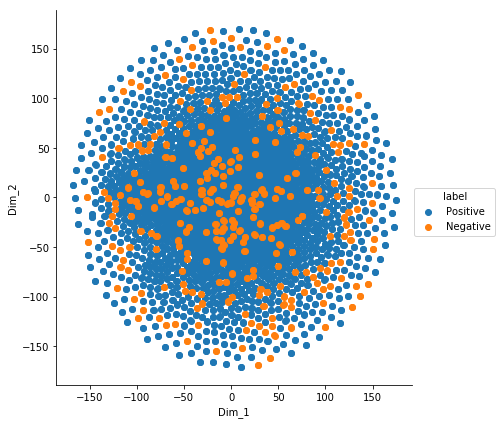

In [34]:
apply_and_plot_tsne(filtered_data_count,filtered_4000.Sentiment,50)

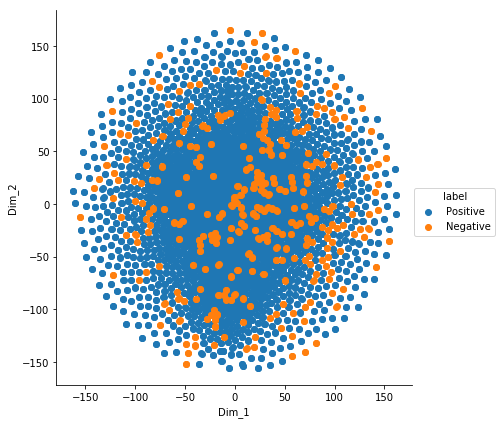

In [40]:
apply_and_plot_tsne(filtered_data_count,filtered_4000.Sentiment,70)

### TF-IDF intialization and dimension creation

In [37]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
filtered_tf_idf = tf_idf_vect.fit_transform(filtered_4000.CleanedText)
print("the type of count vectorizer ",type(filtered_tf_idf))
print("the shape of out TF-IDF vectorizer ",filtered_tf_idf.get_shape())

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out TF-IDF vectorizer  (4000, 53711)


In [38]:
filtered_tf_idf=filtered_tf_idf.toarray()

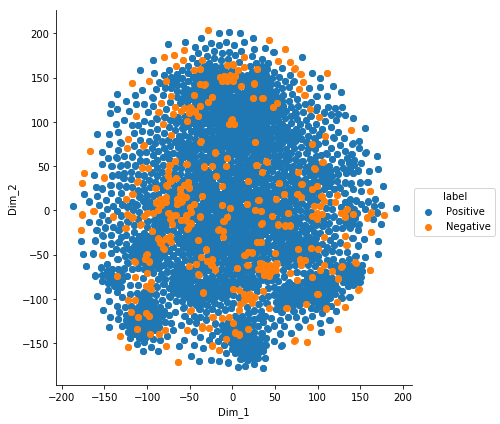

In [39]:
apply_and_plot_tsne(filtered_tf_idf,filtered_4000.Sentiment)

### Wieghted Word2Vec

In [41]:
list_of_sent=[]
for sent in filtered_4000.CleanedText:
    list_of_sent.append(sent.split())

In [48]:
print(len(list_of_sent))
print(list_of_sent[0])

4000
['bought', 'sever', 'vital', 'can', 'dog', 'food', 'product', 'found', 'good', 'qualiti', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'labrador', 'finicki', 'appreci', 'product', 'better']


In [53]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

4000
50


In [55]:
type(sent_vectors)

list

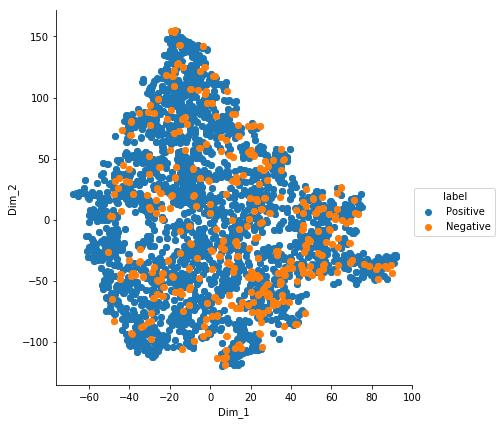

In [57]:
apply_and_plot_tsne(sent_vectors,filtered_4000.Sentiment,50)

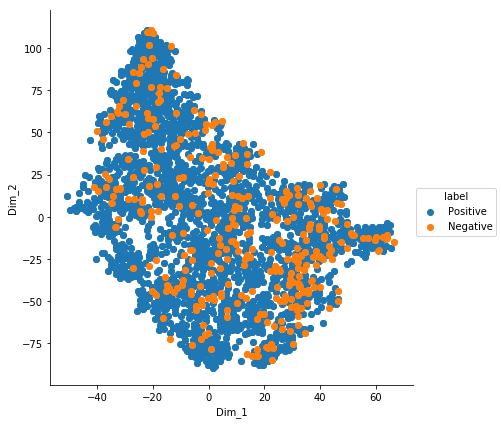

In [58]:
apply_and_plot_tsne(sent_vectors,filtered_4000.Sentiment,100)

### Wieghted TF-IDF

In [60]:
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = filtered_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [65]:
type(tfidf_sent_vectors)

list

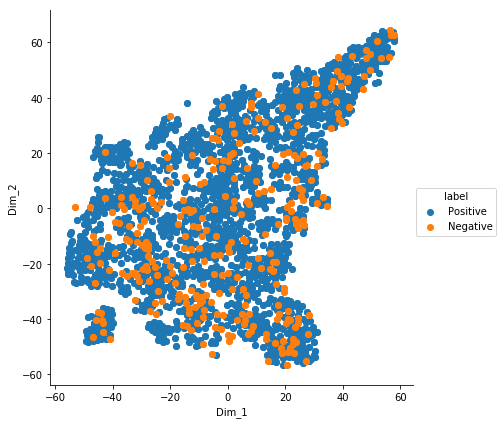

In [66]:
apply_and_plot_tsne(tfidf_sent_vectors,filtered_4000.Sentiment,100)

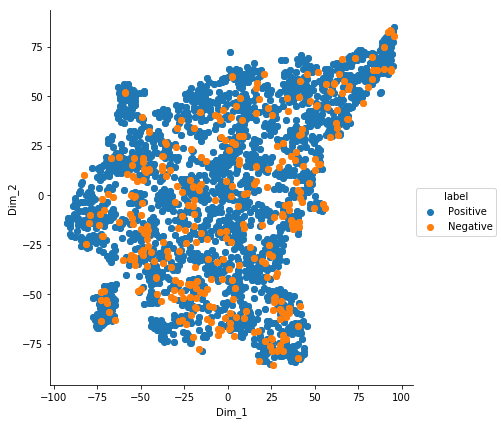

In [67]:
apply_and_plot_tsne(tfidf_sent_vectors,filtered_4000.Sentiment,50)

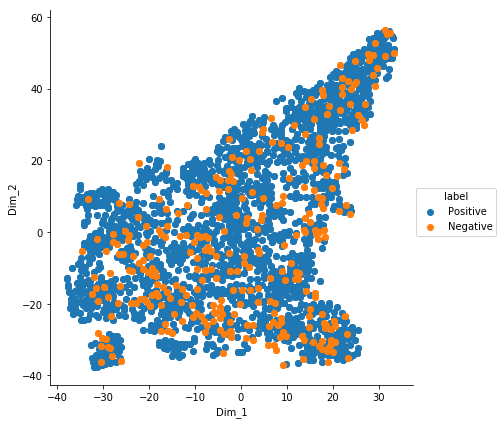

In [68]:
apply_and_plot_tsne(tfidf_sent_vectors,filtered_4000.Sentiment,150)

## Tried for few values of perplexity but couldn't tried for more as its taking huge processing time for each run.